# Importación de librerías

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from src.video_processing_functions import *

# Experimentos para el algoritmo *Frequency Domain Image Blur Measure* (FM)

## Medición sobre todo el frame

A continuación se presenta un experimento para medir el tiempo de ejecución del algoritmo FM sobre todo el frame. Utilizaremos el video [focus_video.mov](resources/focus_video.mov) para la experimentación. 

La función `calculate_video_quality` recibe el path del video y retorna una lista con los valores de calidad de cada frame.  También abre una ventana mostrando el video.

In [2]:
# Define the path to the video
video_path = 'resources/focus_video.mov'

In [15]:
# Calculate the quality measurements of the video
quality_measurements = calculate_video_quality(video_path)

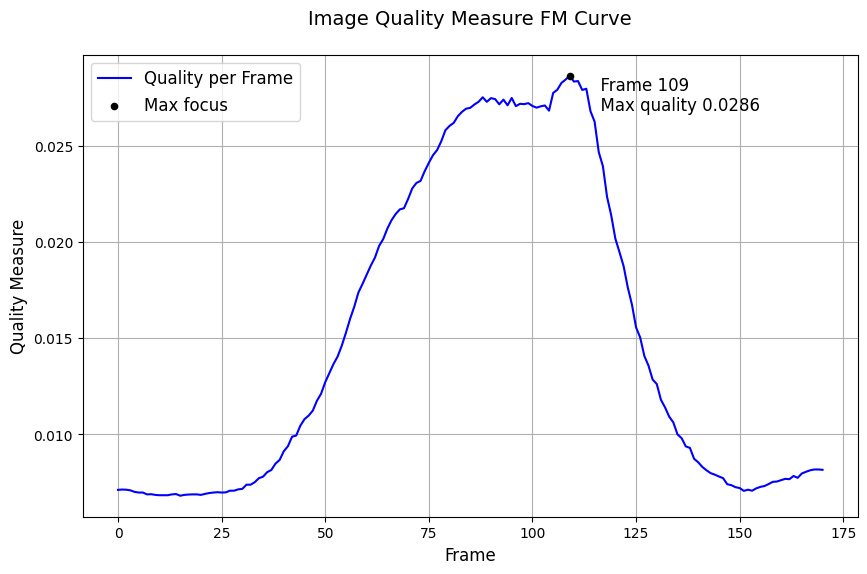

In [4]:
# Find the max focus value and its index
max_focus_index = quality_measurements.index(max(quality_measurements))
max_focus_value = round(max(quality_measurements), 4)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the quality measure curve
plt.plot(quality_measurements, label='Quality per Frame', color='blue')

# Highlight the max focus value
plt.scatter(max_focus_index, max_focus_value, color='black', label='Max focus', zorder=5, edgecolors='black', s=20)
plt.text(max_focus_index + 5, max_focus_value - 0.002, f'  Frame {max_focus_index}\n  Max quality {max_focus_value}', verticalalignment='bottom', fontsize=12)

# Add labels, title, and legend with increased font size
plt.xlabel('Frame', fontsize=12)
plt.ylabel('Quality Measure', fontsize=12)
plt.title('Image Quality Measure FM Curve\n', fontsize=14)

# Add grid lines
plt.grid(True)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

Como se puede ver en la gráfica superior, la calidad de la imagen es variable a lo largo del video. La calidad empieza a subir a partir del frame 30, logra estabilizarse entre los frames 80 y 100, luego alcanza un **punto de máxima calidad de 0.0286 en el frame 109**, posteriormente disminuye.

## Medición sobre una ROI ubicada en el centro de la imagen

Área de la ROI de 5 o 10% del tamaño de la imagen original.

---

A continuación se experimenta con una región de interés (ROI) del 5% del tamaño de la imagen original.

In [5]:
# Calculate the quality measurements of the video with a ROI
roi_percentage = 0.05
quality_measurements_roi = calculate_video_quality(video_path, roi_percentage=roi_percentage)

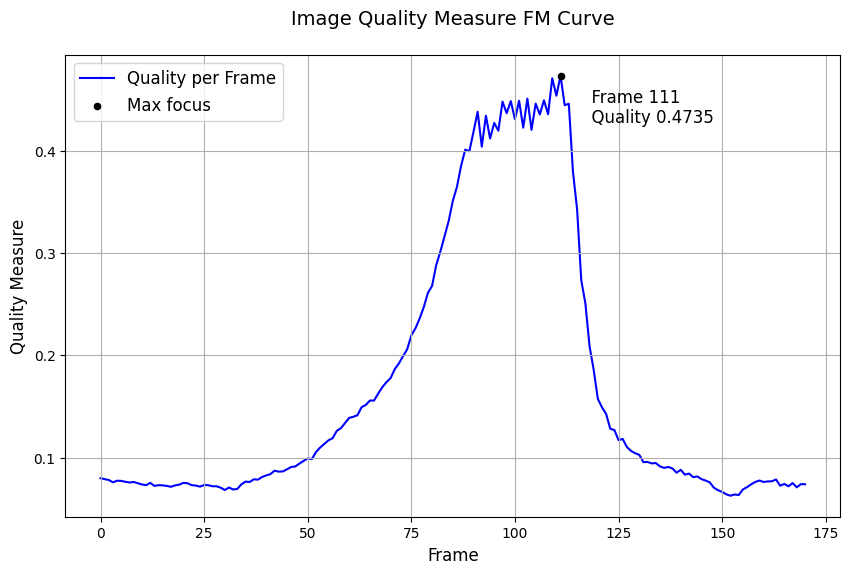

In [6]:
# Find the max focus value and its index
max_focus_index = quality_measurements_roi.index(max(quality_measurements_roi))
max_focus_value = round(max(quality_measurements_roi), 4)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the quality measure curve
plt.plot(quality_measurements_roi, label='Quality per Frame', color='blue', zorder=1)

# Highlight the max focus value
plt.scatter(max_focus_index, max_focus_value, color='black', label='Max focus', zorder=5, edgecolors='black', s=20)
plt.text(max_focus_index + 5, max_focus_value - 0.05, f'  Frame {max_focus_index}\n  Quality {max_focus_value}', verticalalignment='bottom', fontsize=12)

# Add labels, title, and legend with increased font size
plt.xlabel('Frame', fontsize=12)
plt.ylabel('Quality Measure', fontsize=12)
plt.title('Image Quality Measure FM Curve\n', fontsize=14)

# Add grid lines
plt.grid(True)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

Podemos ver en la imagen superior que la calidad de la imagen es variable a lo largo del video. La calidad empieza a subir a partir del frame 30 aproximadamente, logra estabilizarse entre los frames 80 y 120, luego alcanza un **punto de máxima calidad de 0.4735 en el frame 111**, posteriormente disminuye. 

Nótese que la calidad de la imagen en la ROI es mayor que la calidad de la imagen completa.

Ahora se experimenta con una región de interés (ROI) del 10% del tamaño de la imagen original.

In [7]:
# Calculate the quality measurements of the video with a ROI
roi_percentage = 0.1
quality_measurements_roi = calculate_video_quality(video_path, roi_percentage=roi_percentage)

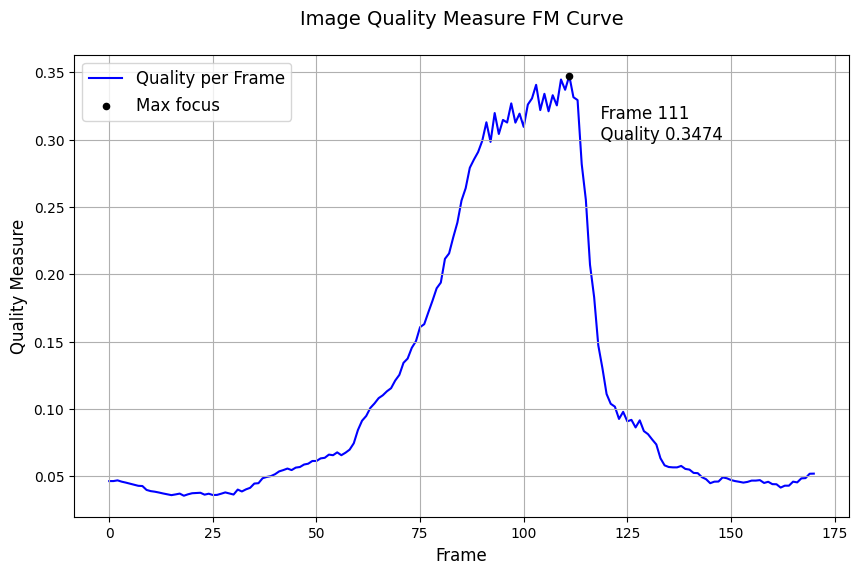

In [8]:
# Find the max focus value and its index
max_focus_index = quality_measurements_roi.index(max(quality_measurements_roi))
max_focus_value = round(max(quality_measurements_roi), 4)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the quality measure curve
plt.plot(quality_measurements_roi, label='Quality per Frame', color='blue', zorder=1)

# Highlight the max focus value
plt.scatter(max_focus_index, max_focus_value, color='black', label='Max focus', zorder=5, edgecolors='black', s=20)
plt.text(max_focus_index + 5, max_focus_value - 0.05, f'  Frame {max_focus_index}\n  Quality {max_focus_value}', verticalalignment='bottom', fontsize=12)

# Add labels, title, and legend with increased font size
plt.xlabel('Frame', fontsize=12)
plt.ylabel('Quality Measure', fontsize=12)
plt.title('Image Quality Measure FM Curve\n', fontsize=14)

# Add grid lines
plt.grid(True)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

Podemos ver en la imagen superior que el frame donde se alcanza la máxima calidad es el mismo que en el caso anterior, es decir, el frame 111. La calidad de la imagen sin embargo es menor que en el caso anterior. Esto puede deberse a que la ROI es más grande y por lo tanto analiza más información de la imagen.

## Medición sobre una matriz de enfoque

Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores 
arbitrarios, probar con varios valores 3x3, 7x5, etc … (al menos 3)

----

La función [calculate_video_quality_grid](src/video_processing_functions.py) recibe el path del video, el tamaño de la ROI y el tamaño de la matriz de enfoque. Retorna una lista con los valores de calidad de cada frame. En la función se computa una matríz de enfoque compuesta por un arreglo de $N \times M$ elementos rectangulares equiespaciados y se calcula la calidad de la imagen considerando el promedio de la calidad de cada elemento de la matriz, para obtener un valor de calidad correspondiente al frame.

In [3]:
quality_measurements_grid = calculate_video_quality_grid(video_path, N=3, M=3, roi_percentage=0.2)

Al dividir cada frame en una cuadrícula de $𝑁 \times M$ elementos rectangulares, se obtiene una medida de enfoque para cada sección, permitiendo detectar variaciones locales que podrían perderse en una evaluación global. Promediar estas medidas ofrece una representación precisa de la calidad de enfoque del frame completo, suavizando las fluctuaciones locales. En comparación con métodos que evalúan el frame completo o subregiones fijas, el enfoque de cuadrículas proporciona una mejor adaptabilidad y precisión.

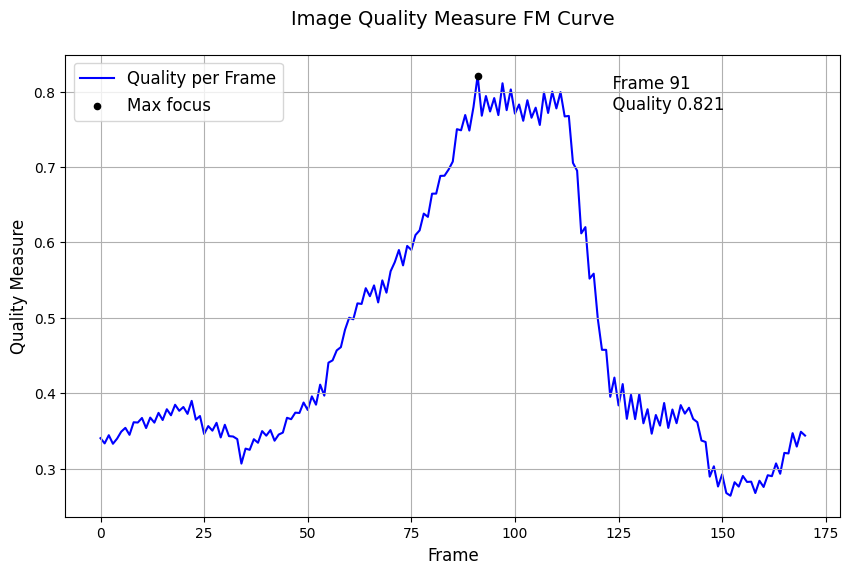

In [4]:
# Find the max focus value and its index
max_focus_index = quality_measurements_grid.index(max(quality_measurements_grid))
max_focus_value = round(max(quality_measurements_grid), 4)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the quality measure curve
plt.plot(quality_measurements_grid, label='Quality per Frame', color='blue', zorder=1)

# Highlight the max focus value
plt.scatter(max_focus_index, max_focus_value, color='black', label='Max focus', zorder=5, edgecolors='black', s=20)
plt.text(max_focus_index + 30, max_focus_value - 0.05, f'  Frame {max_focus_index}\n  Quality {max_focus_value}', verticalalignment='bottom', fontsize=12)

# Add labels, title, and legend with increased font size
plt.xlabel('Frame', fontsize=12)
plt.ylabel('Quality Measure', fontsize=12)
plt.title('Image Quality Measure FM Curve\n', fontsize=14)

# Add grid lines
plt.grid(True)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

En la imagen superior se muestra la calidad de la imagen en función del frame para una matriz de enfoque de 3x3. Se puede observar que la calidad sigue una tendencia similar a las experimentaciones anteriores. Sin embargo, se alcanza un punto de máxima calidad mayor, en este caso de 0.8210 en el frame 91. Esto puede deberse a que la matriz de enfoque permite detectar variaciones locales que podrían perderse en una evaluación global de la imagen completa.

A continuación, se experimenta con cuatro matrices de enfoque de tamaños 5x3, 7x5, 5x5, 7x7.

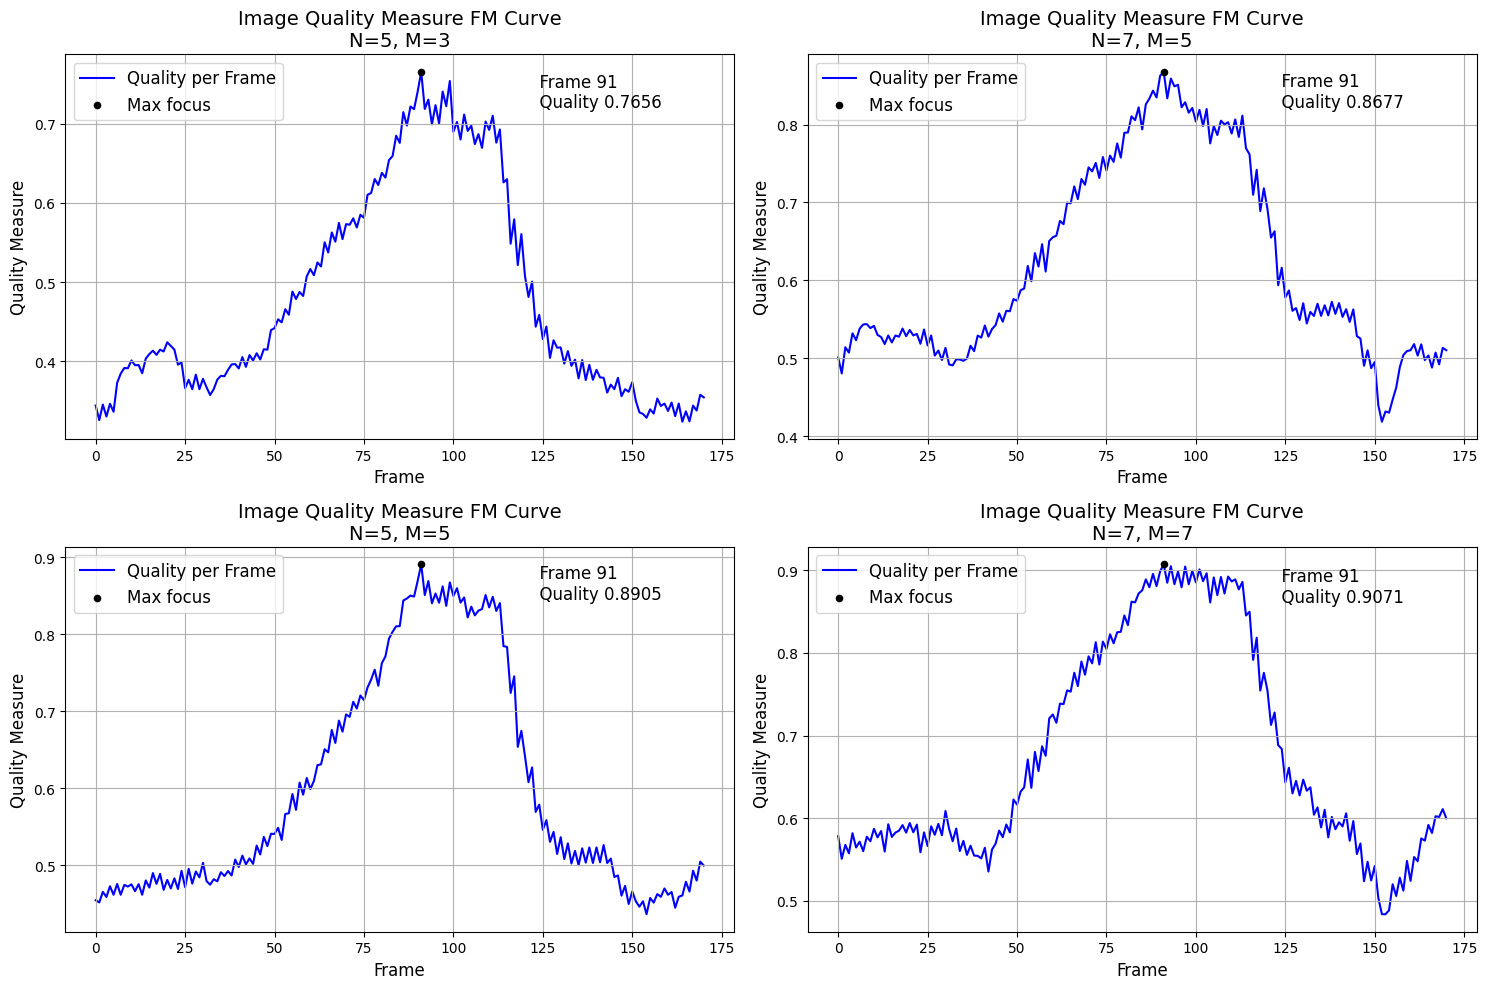

In [9]:
variations = [
    {'N': 5, 'M': 3, 'roi_percentage': 0.2},
    {'N': 7, 'M': 5, 'roi_percentage': 0.2},
    {'N': 5, 'M': 5, 'roi_percentage': 0.2},
    {'N': 7, 'M': 7, 'roi_percentage': 0.2}
]

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, var in enumerate(variations):
    # Compute the quality measurements of the video with a grid
    quality_measurements_grid = calculate_video_quality_grid(video_path, N=var['N'], M=var['M'], roi_percentage=var['roi_percentage'])
    
    # Find the max focus value and its index
    max_focus_index = quality_measurements_grid.index(max(quality_measurements_grid))
    max_focus_value = round(max(quality_measurements_grid), 4)

    # Select the subplot
    ax = axs[i//2, i%2]

    # Graph the quality measure curve
    ax.plot(quality_measurements_grid, label='Quality per Frame', color='blue', zorder=1)

    # Highlight the max focus value
    ax.scatter(max_focus_index, max_focus_value, color='black', label='Max focus', zorder=5, edgecolors='black', s=20)
    ax.text(max_focus_index + 30, max_focus_value - 0.05, f'  Frame {max_focus_index}\n  Quality {max_focus_value}', verticalalignment='bottom', fontsize=12)

    # Add labels, title, and legend
    ax.set_xlabel('Frame', fontsize=12)
    ax.set_ylabel('Quality Measure', fontsize=12)
    ax.set_title(f'Image Quality Measure FM Curve\nN={var["N"]}, M={var["M"]}', fontsize=14)

    # Add grid lines
    ax.grid(True)

    # Add legend
    ax.legend(fontsize=12)

# Adjust the layout
plt.tight_layout()

En las cuatro imágenes superiores se pueden experimentos ejecutados con cuatro diferentes matrices de enfoque. Se puede observar que la calidad de la imagen mantiene una tendencia similar a las experimentaciones anteriores. Igualmente, el punto de máxima calidad se alcanza en el frame 91. Sin embargo, se puede observar que la calidad de la imagen es mayor en las matrices de enfoque más grandes. 

Algo a notar es que la matríz 7x7 alcanza una calidad de 0.9071, manteniendo valores similares entre los frames 80 y 120. 